In [ ]:
import numpy as np
import scanpy as sc
import warnings
import sys
import os

backend_path = os.path.join(os.path.dirname(os.getcwd()), 'Backend')
if backend_path not in sys.path:
    sys.path.append(backend_path)

from slingshot import direct_slingshot_analysis

warnings.filterwarnings('ignore')

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/", R: "/Users/siyuanzhao/Documents/GitHub/Biovis2025/Python"
  warnings.warn(
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "R_SESSION_TMPDIR" redefined by R and overriding existing variable. Current: "/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T//Rtmp5t764I", R: "/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T//Rtmpx0B7dX"
  warnings.warn(


In [2]:
cell_ids = [
  "26908",
  "26910",
  "26922",
  "26927",
  "26931",
  "26934",
  "26947",
  "26952",
  "26980",
  "26990",
  "26992",
  "27026",
  "27030",
  "27045",
  "27046",
  "27051",
  "27067",
  "27086",
  "27096",
  "27133",
  "27136",
  "27159",
  "27163",
  "27171",
  "27187",
  "27221",
  "27247",
  "27254",
  "27285",
  "27290",
  "27313",
  "27317",
  "27358",
  "27373",
  "27378",
  "27389",
  "27406",
  "27408",
  "27415",
  "27435",
  "27439",
  "27440",
  "27445",
  "27446",
  "27447",
  "27473",
  "27476",
  "27481",
  "27501",
  "27515",
  "27529",
  "27531",
  "27532",
  "27533",
  "27556",
  "27569",
  "27576",
  "27590",
  "27601",
  "27607",
  "27624",
  "27628",
  "27632",
  "27635",
  "27644",
  "27647",
  "27654",
  "27682",
  "27701",
  "27711",
  "27717",
  "27757",
  "27774",
  "27781",
  "27785",
  "27813",
  "27815",
  "27817",
  "27822",
  "27835",
  "27843",
  "27847",
  "27861",
  "27871",
  "27878",
  "27909",
  "27920",
  "27926",
  "27927",
  "27932",
  "27938",
  "27940",
  "27947",
  "27948",
  "27967",
  "27972",
  "27980",
  "27981",
  "27985",
  "27990",
  "27997",
  "28001",
  "28013",
  "28016",
  "28040",
  "28054",
  "28058",
  "28064",
  "28067",
  "28081",
  "28085",
  "28092",
  "28109",
  "28133",
  "28139",
  "28160",
  "28161",
  "28169",
  "28173",
  "28175",
  "28197",
  "28203",
  "28204",
  "28205",
  "28233",
  "28242",
  "28244",
  "28258",
  "28266",
  "28268",
  "28272",
  "28287",
  "28298",
  "28312",
  "28313",
  "28319",
  "28322",
  "28325",
  "28330",
  "28331",
  "28335",
  "28338",
  "28343",
  "28370",
  "28371",
  "28395",
  "28405",
  "28413",
  "28424",
  "28433",
  "28438",
  "28443",
  "28446",
  "28458",
  "28465",
  "28468",
  "28480",
  "28494",
  "28507",
  "28522",
  "28533",
  "28539",
  "28547",
  "28550",
  "28559",
  "28571",
  "28573",
  "28585",
  "28597",
  "28601",
  "28605",
  "28638",
  "28639",
  "28653",
  "28657",
  "28661",
  "28667",
  "28668",
  "28671",
  "28693",
  "28726",
  "28727",
  "28733",
  "28735",
  "28740",
  "28745",
  "28748",
  "28763",
  "28773",
  "28775",
  "28777",
  "28787",
  "28799",
  "28801",
  "28831",
  "28834",
  "28853",
  "28855",
  "28856",
  "28867",
  "28869",
  "28872",
  "28884",
  "28935",
  "28939",
  "28943",
  "28944",
  "28952",
  "28955",
  "28969",
  "28982",
  "28984",
  "29004",
  "29007",
  "29016",
  "29017",
  "29024",
  "29028",
  "29042",
  "29051",
  "29055",
  "29062",
  "29070",
  "29073",
  "29082",
  "29095",
  "29100",
  "29104",
  "29105",
  "29107",
  "29108",
  "29109",
  "29110",
  "29112",
  "29115",
  "29120",
  "29122",
  "29123",
  "29124",
  "29136",
  "29138",
  "29140",
  "29143",
  "29146",
  "29158",
  "29175",
  "29181",
  "29184",
  "29195",
  "29200",
  "29204",
  "29210",
  "29224",
  "29234",
  "29237",
  "29239",
  "29244",
  "29249",
  "29254",
  "29259",
  "29261",
  "29271",
  "29286",
  "29287",
  "29292",
  "29297",
  "29332",
  "29333",
  "29347",
  "29351",
  "29357",
  "29366",
  "29374",
  "29377",
  "29381",
  "29383",
  "29384",
  "29389",
  "29391",
  "29409",
  "29429",
  "29433",
  "29440",
  "29446",
  "29478",
  "29480",
  "29481",
  "29486",
  "29490",
  "29491",
  "29518",
  "29522",
  "29561",
  "29564",
  "29575",
  "29589",
  "29601",
  "29605",
  "29619",
  "29626",
  "29631",
  "29644",
  "29649",
  "29657",
  "29659",
  "29663",
  "29671",
  "29682",
  "29684",
  "29697",
  "29700",
  "29702",
  "29710",
  "29716",
  "29718",
  "29727",
  "29736",
  "29737",
  "29740",
  "29750",
  "29763",
  "29770",
  "29782",
  "29789",
  "29810",
  "29842",
  "29848",
  "29862",
  "29876",
  "29898",
  "29902",
  "29913",
  "29916",
  "29936",
  "29940",
  "29958",
  "29967",
  "29971",
  "29984",
  "30006",
  "30007",
  "30010",
  "30011",
  "30016",
  "30019",
  "30023",
  "30024",
  "30025",
  "30040",
  "30046",
  "30052",
  "30060",
  "30062",
  "30070",
  "30072",
  "30078",
  "30080",
  "30083",
  "30088",
  "30092",
  "30110",
  "30115",
  "30117",
  "30118",
  "30125",
  "30126",
  "30129",
  "30145",
  "30154",
  "30160",
  "30163",
  "30190",
  "30193",
  "30196",
  "30205",
  "30214",
  "30218",
  "30240",
  "30258",
  "30261",
  "30264",
  "30275",
  "30290",
  "30293",
  "30323",
  "30334",
  "30336",
  "30338",
  "30348",
  "30357",
  "30359",
  "30361",
  "30362",
  "30368",
  "30369",
  "30387",
  "30391",
  "30396",
  "30397",
  "30399",
  "30411",
  "30414",
  "30426",
  "30442",
  "30457",
  "30458",
  "30463",
  "30469",
  "30472",
  "30479",
  "30481",
  "30491",
  "30495",
  "30496",
  "30501",
  "30517",
  "30519",
  "30530",
  "30533",
  "30540",
  "30542",
  "30552",
  "30553",
  "30581",
  "30587",
  "30592",
  "30595",
  "30596",
  "30604",
  "30614",
  "30621",
  "30625",
  "30645",
  "30655",
  "30665",
  "30669",
  "30670",
  "30671",
  "30678",
  "30700",
  "30704",
  "30705",
  "30706",
  "30709",
  "30724",
  "30741",
  "30742",
  "30747",
  "30748",
  "30762",
  "30768",
  "30769",
  "30771",
  "30792",
  "30793",
  "30800",
  "30823",
  "30826",
  "30830",
  "30834",
  "30845",
  "30847",
  "30850",
  "30856",
  "30869",
  "30873",
  "30899",
  "30909",
  "30910",
  "30920",
  "30926",
  "30927",
  "30930",
  "30942",
  "30944",
  "30953",
  "30956",
  "30964",
  "30966",
  "30975",
  "30989",
  "30994",
  "31008",
  "31015",
  "31016",
  "31033",
  "31034",
  "31036",
  "31049",
  "31055",
  "31058",
  "31095",
  "31097",
  "31103",
  "31125",
  "31137",
  "31139",
  "31143",
  "31164",
  "31166",
  "31171",
  "31182",
  "31183",
  "31195",
  "31219",
  "31254",
  "31255",
  "31257",
  "31266",
  "31270",
  "31277",
  "31278",
  "31280",
  "31299",
  "31315",
  "31333",
  "31365",
  "31366",
  "31386",
  "31404",
  "31406",
  "31410",
  "31418",
  "31422",
  "31425",
  "31438",
  "31445",
  "31481",
  "31490",
  "31494",
  "31495",
  "31506",
  "31509",
  "31535",
  "31550",
  "31569",
  "31581",
  "31589",
  "31616",
  "31620",
  "31627",
  "31632",
  "31638",
  "31649",
  "31651",
  "31690",
  "31701",
  "31703",
  "31722",
  "31734",
  "31751",
  "31762",
  "31764",
  "31768",
  "31786",
  "31788",
  "31796",
  "31798",
  "31809",
  "31830",
  "31835",
  "31839",
  "31856",
  "31866",
  "31893",
  "31904",
  "31912",
  "31921",
  "31932",
  "31945",
  "31951",
  "31962",
  "31968",
  "31979",
  "32004",
  "32005",
  "32016",
  "32033",
  "32062",
  "32077",
  "32097",
  "32099",
  "32100",
  "32102",
  "32105",
  "32109",
  "32110",
  "32112",
  "32117",
  "32122",
  "32124",
  "32128",
  "32143",
  "32154",
  "32161",
  "32164",
  "32180",
  "32229",
  "32231",
  "32232",
  "32250",
  "32268",
  "32269",
  "32276",
  "32288",
  "32306",
  "32311",
  "32313",
  "32336",
  "32344",
  "32350",
  "32351",
  "32363",
  "32368",
  "32386",
  "32392",
  "32420",
  "32440",
  "32448",
  "32487",
  "32488",
  "32503",
  "32519",
  "32521",
  "32522",
  "32537",
  "32554",
  "32563",
  "32576",
  "32586",
  "32595",
  "32599",
  "32606",
  "32611",
  "32621",
  "32624",
  "32625",
  "32629",
  "32652",
  "32654",
  "32671",
  "32676",
  "32677",
  "32678",
  "32679",
  "32682",
  "32687",
  "32695",
  "32708",
  "32719",
  "32723",
  "32726",
  "32732",
  "32739",
  "32742",
  "32746",
  "32760",
  "32787",
  "32824",
  "32843",
  "32847",
  "32851",
  "32860",
  "32883",
  "32905",
  "32907",
  "32908",
  "32937",
  "32957",
  "32960",
  "32972",
  "32975",
  "32977",
  "32997",
  "32998",
  "33016",
  "33052",
  "33056",
  "33067",
  "33072",
  "33073",
  "33082",
  "33086",
  "33091",
  "33102",
  "33126",
  "33150",
  "33152",
  "33200",
  "33208",
  "33229",
  "33239",
  "33245",
  "33247",
  "33272",
  "33280",
  "33284",
  "33285",
  "33288",
  "33308",
  "33314",
  "33319",
  "33333",
  "33335",
  "33343",
  "33346",
  "33349",
  "33359",
  "33362",
  "33376",
  "33424",
  "33433",
  "33440",
  "33449",
  "33457",
  "33460",
  "33470",
  "33472",
  "33475",
  "33493",
  "33503",
  "33511",
  "33512",
  "33522",
  "33529",
  "33530",
  "33533",
  "33537",
  "33567",
  "33580",
  "33603",
  "33604",
  "33614",
  "33616",
  "33619",
  "33626",
  "33649",
  "33651",
  "33657",
  "33659",
  "33662",
  "33694",
  "33724",
  "33729",
  "33730",
  "33745",
  "33750",
  "33776",
  "33781",
  "33792",
  "33794",
  "33806",
  "33808",
  "33820",
  "33826",
  "33828",
  "33832",
  "33833",
  "33844",
  "33854",
  "33862",
  "33880",
  "33885",
  "33887",
  "33897",
  "33908",
  "33923",
  "33933",
  "33942",
  "33973",
  "33991",
  "33999",
  "34001",
  "34005",
  "34006",
  "34018",
  "34020",
  "34024",
  "34029",
  "34032",
  "34046",
  "34052",
  "34064",
  "34067",
  "34079",
  "34086",
  "34092",
  "34093",
  "34095",
  "34096",
  "34108",
  "34114",
  "34127",
  "34131",
  "34137",
  "34147",
  "34152",
  "34163",
  "34167",
  "34185",
  "34187",
  "34189",
  "34208",
  "34210",
  "34220",
  "34226",
  "34227",
  "34237",
  "34238",
  "34242",
  "34254",
  "34271",
  "34279",
  "34286",
  "34291",
  "34298",
  "34302",
  "34304",
  "34313",
  "34321",
  "34323",
  "34335",
  "34336",
  "34344",
  "34345",
  "34366",
  "34368",
  "34369",
  "34372",
  "34379",
  "34390",
  "34409",
  "34417",
  "34420",
  "34430",
  "34432",
  "34433",
  "34444",
  "34457",
  "34458",
  "34459",
  "34463",
  "34472",
  "34487",
  "34491",
  "34508",
  "34514",
  "34540",
  "34553",
  "34567",
  "34582",
  "34594",
  "34595",
  "34608",
  "34616",
  "34643",
  "34644",
  "34649",
  "34667",
  "34688",
  "34697",
  "34702",
  "34712",
  "34745",
  "34748",
  "34773",
  "34774",
  "34782",
  "34784",
  "34789",
  "34819",
  "34821",
  "34860",
  "34861",
  "34865",
  "34870",
  "34878",
  "34887",
  "34900",
  "34915",
  "34916",
  "34939",
  "34942",
  "34943",
  "34944",
  "34947",
  "34957",
  "34975",
  "35015",
  "35023",
  "35030",
  "35044",
  "35066",
  "35075",
  "35078",
  "35113",
  "35128",
  "35134",
  "35139",
  "35151",
  "35163",
  "35167",
  "35172",
  "35179",
  "35182",
  "35194",
  "35197",
  "35203",
  "35208",
  "35215",
  "35228",
  "35230",
  "35232",
  "35257",
  "35270",
  "35297",
  "35301",
  "35309",
  "35312",
  "35319",
  "35329",
  "35333",
  "35335",
  "35347",
  "35406",
  "35410",
  "35425",
  "35428",
  "35436",
  "35442",
  "35446",
  "35449",
  "35450",
  "35452",
  "35462",
  "35468",
  "35481",
  "35482",
  "35485",
  "35505",
  "35516",
  "35525",
  "35534",
  "35550",
  "35564",
  "35575",
  "35578",
  "35612",
  "35622",
  "35648",
  "35650",
  "35654",
  "35655",
  "35665",
  "35674",
  "35677",
  "35686",
  "35722",
  "35724",
  "35730",
  "35733",
  "35738",
  "35759",
  "35761",
  "35762",
  "35770",
  "35773",
  "35781",
  "35785",
  "35792",
  "35795",
  "35802",
  "35807",
  "35809",
  "35810",
  "35817",
  "35823",
  "35825",
  "35833",
  "35848",
  "35849",
  "35862",
  "35869",
  "35874",
  "35882",
  "35901",
  "35903",
  "35907",
  "35936",
  "35939",
  "35944",
  "35948",
  "35966",
  "35985",
  "35995",
  "36000",
  "36014",
  "36020",
  "36026",
  "36036",
  "36045",
  "36053",
  "36056",
  "36070",
  "36074",
  "36080",
  "36101",
  "36108",
  "36112",
  "36116",
  "36117",
  "36119",
  "36133",
  "36144",
  "36149",
  "36157",
  "36161",
  "36185",
  "36192",
  "36200",
  "36208",
  "36225",
  "36227",
  "36250",
  "36254",
  "36256",
  "36262",
  "36275",
  "36277",
  "36279",
  "36329",
  "36340",
  "36341",
  "36348",
  "36356",
  "36367",
  "36375",
  "36385",
  "36391",
  "36392",
  "36405",
  "36413",
  "36424",
  "36433",
  "36452",
  "36453",
  "36454",
  "36456",
  "36460",
  "36470",
  "36481",
  "36519",
  "36534",
  "36575",
  "36577",
  "36584",
  "36589",
  "36591",
  "36600",
  "36611",
  "36612",
  "36615",
  "36618",
  "36619",
  "36635",
  "36641",
  "36642",
  "36645",
  "36646",
  "36680",
  "36688",
  "36691",
  "36695",
  "36704",
  "36706",
  "36729",
  "36749",
  "36760",
  "36781",
  "36788",
  "36795",
  "36805",
  "36806",
  "36810",
  "36825",
  "36842",
  "36853",
  "36860",
  "36877",
  "36899",
  "36904",
  "36908",
  "36943",
  "36952",
  "36979",
  "36980",
  "36984",
  "36998",
  "37001",
  "37003",
  "37004",
  "37017",
  "37029",
  "37032",
  "37034",
  "37043",
  "37069",
  "37088",
  "37103",
  "37105",
  "37113",
  "37115",
  "37122",
  "37141",
  "37162",
  "37170",
  "37172",
  "37182",
  "37200",
  "37207",
  "37211",
  "37213",
  "37223",
  "37224",
  "37227",
  "37232",
  "37234",
  "37237",
  "37263",
  "37264",
  "37270",
  "37271",
  "37285",
  "37289",
  "37313",
  "37314",
  "37343",
  "37348",
  "37361",
  "37369",
  "37372",
  "37387",
  "37414",
  "37423",
  "37426",
  "37437",
  "37447",
  "37479",
  "37482",
  "37492",
  "37508",
  "37518",
  "37522",
  "37549",
  "37553",
  "37559",
  "37563",
  "37578",
  "37580",
  "37592",
  "37610",
  "37613",
  "37615",
  "37630",
  "37643",
  "37674",
  "37679",
  "37687",
  "37696",
  "37702",
  "37707",
  "37710",
  "37731",
  "37735",
  "37740",
  "37744",
  "37749",
  "37786",
  "37791",
  "37799",
  "37800",
  "37804",
  "37816",
  "37821",
  "37832",
  "37849",
  "37851",
  "37879",
  "37896",
  "37906",
  "37908",
  "37943",
  "37945",
  "37966",
  "37987",
  "38009",
  "38017",
  "38026",
  "38052",
  "38065",
  "38079",
  "38090",
  "38114",
  "38117",
  "38121",
  "38128",
  "38134",
  "38146",
  "38174",
  "38176",
  "38180",
  "38183",
  "38217",
  "38218",
  "38228",
  "38230",
  "38233",
  "38247",
  "38261",
  "38287",
  "38302",
  "38309",
  "38324",
  "38336",
  "38351",
  "38358",
  "38368",
  "38369",
  "38375",
  "38386",
  "38387",
  "38397",
  "38403",
  "38420",
  "38442",
  "38453",
  "38466",
  "38470",
  "38498",
  "38501",
  "38516",
  "38520",
  "38521",
  "38524",
  "38527",
  "38530",
  "38537",
  "38559",
  "38562",
  "38569",
  "38575",
  "38589",
  "38593",
  "38609",
  "38610",
  "38641",
  "38648",
  "38651",
  "38660",
  "38668",
  "38670",
  "38684",
  "38686",
  "38690",
  "38694",
  "38706",
  "38717",
  "38724",
  "38729",
  "38740",
  "38744",
  "38749",
  "38775",
  "38779",
  "38785",
  "38788",
  "38814",
  "38824",
  "38825",
  "38826",
  "38836",
  "38842",
  "38854",
  "38870",
  "38888",
  "38904",
  "38905",
  "38909",
  "38927",
  "38935",
  "38959",
  "38963",
  "38975",
  "38986",
  "38988",
  "39000",
  "39022",
  "39026",
  "39031",
  "39038",
  "39049",
  "39055",
  "39066",
  "39067",
  "39068",
  "39104",
  "39107",
  "39115",
  "39126",
  "39129",
  "39133",
  "39145",
  "39146",
  "39161",
  "39173",
  "39186",
  "39191",
  "39195",
  "39217",
  "39219",
  "39225",
  "39231",
  "39264",
  "39271",
  "39274",
  "39285",
  "39291",
  "39309",
  "39312",
  "39313",
  "39324",
  "39338",
  "39341",
  "39342",
  "39343",
  "39375",
  "39376",
  "39436",
  "39480",
  "39486",
  "39498",
  "39508",
  "39523",
  "39546",
  "39552",
  "39558",
  "39575",
  "39579",
  "39587",
  "39595",
  "39597",
  "39603",
  "39608",
  "39620",
  "39622",
  "39623",
  "39632",
  "39655",
  "39659",
  "39674",
  "39681",
  "39687",
  "39692",
  "39699",
  "39701",
  "39712",
  "39727",
  "39731",
  "39745",
  "39746",
  "39748",
  "39750",
  "39762",
  "39775",
  "39786",
  "39799",
  "39805",
  "39825",
  "39828",
  "39848",
  "39851",
  "39861",
  "39871",
  "39880",
  "39881",
  "39882",
  "39888",
  "39899",
  "39903",
  "39904",
  "39906",
  "39921",
  "39922",
  "39923",
  "39946",
  "39951",
  "39960",
  "40007",
  "40014",
  "40017",
  "40020",
  "40028",
  "40053",
  "40064",
  "40102",
  "40115",
  "40118",
  "40119",
  "40129",
  "40144",
  "40153",
  "40154",
  "40162",
  "40181",
  "40183",
  "40184",
  "40185",
  "40186",
  "40193",
  "40201",
  "40209",
  "40210",
  "40216",
  "40218",
  "40221",
  "40228",
  "40232",
  "40233",
  "40235",
  "40237",
  "40239",
  "40240",
  "40241",
  "40248",
  "40261",
  "40263",
  "40264",
  "40265",
  "40272",
  "40274",
  "40285",
  "40294",
  "40302",
  "40303",
  "40306",
  "40308",
  "40312",
  "40313",
  "40316",
  "40317",
  "40319",
  "40321",
  "40326",
  "40331",
  "40334",
  "40335",
  "40338",
  "40341",
  "40344",
  "40346",
  "40350",
  "40353",
  "40360",
  "40379",
  "40384",
  "40386",
  "40397",
  "40406",
  "40407",
  "40408",
  "40415",
  "40427",
  "40436",
  "40440",
  "40441",
  "40450",
  "40455",
  "40456",
  "40457",
  "40463",
  "40467",
  "40470",
  "40474",
  "40488",
  "40489",
  "40493",
  "40495",
  "40502",
  "40503",
  "40508",
  "40515",
  "40521",
  "40523",
  "40528",
  "40532",
  "40534",
  "40541",
  "40542",
  "40547",
  "40551",
  "40554",
  "40556",
  "40561",
  "40562",
  "40565",
  "40567",
  "40574",
  "40576",
  "40578",
  "40580",
  "40586",
  "40587",
  "40590",
  "40601",
  "40614",
  "40618",
  "40619",
  "40620",
  "40622",
  "40629",
  "40630",
  "40634",
  "40636",
  "40638",
  "40675",
  "40682",
  "40685",
  "40688",
  "40692",
  "40699",
  "40700",
  "40721",
  "40724",
  "40725",
  "40731",
  "40734",
  "40743",
  "40757",
  "40760",
  "40764",
  "40765",
  "40766",
  "40773",
  "40785",
  "40789",
  "40790",
  "40791",
  "40796",
  "40800",
  "40813",
  "40817",
  "40826",
  "40831",
  "40832",
  "40842",
  "40847",
  "40848",
  "40850",
  "40856",
  "40857",
  "40867",
  "40884",
  "40886",
  "40890",
  "40891",
  "40892",
  "40896",
  "40901",
  "40905",
  "40906",
  "40907",
  "40908",
  "40925",
  "40927",
  "40932",
  "40935",
  "40936",
  "40937",
  "40938",
  "40939",
  "40945",
  "40949",
  "40950",
  "40952",
  "40953",
  "40960",
  "40965",
  "40966",
  "40978",
  "40980",
  "40986",
  "40988",
  "40992",
  "40999",
  "41001",
  "41004",
  "41008",
  "41012",
  "41016",
  "41018",
  "41019",
  "41023",
  "41039",
  "41049",
  "41055",
  "41057",
  "41059",
  "41064",
  "41068",
  "41069",
  "41070",
  "41074",
  "41078",
  "41081",
  "41090",
  "41091",
  "41104",
  "41112",
  "41114",
  "41117",
  "41121",
  "41124",
  "41131",
  "41140",
  "41142",
  "41145",
  "41155",
  "41160",
  "41162",
  "41168",
  "41176",
  "41177",
  "41179",
  "41182",
  "41189",
  "41199",
  "41200",
  "41201",
  "41202",
  "41219",
  "41221",
  "41226",
  "41227",
  "41236",
  "41241",
  "41243",
  "41258",
  "41260",
  "41264",
  "41265",
  "41266",
  "41269",
  "41275",
  "41281",
  "41283",
  "41289",
  "41294",
  "41297",
  "41299",
  "41300",
  "41309",
  "41313",
  "41336",
  "41341",
  "41349",
  "41370",
  "41376",
  "41382",
  "41383",
  "41387",
  "41388",
  "41393",
  "41400",
  "41404",
  "41416",
  "41418",
  "41419",
  "41431",
  "41446",
  "41463",
  "41473",
  "41481",
  "41484",
  "41489",
  "41498",
  "41504",
  "41505",
  "41507",
  "41511",
  "41514",
  "41516",
  "41521",
  "41522",
  "41524",
  "41532",
  "41533",
  "41552",
  "41553",
  "41554",
  "41560",
  "41576",
  "41580",
  "41592",
  "41610",
  "41621",
  "41633",
  "41642",
  "41643",
  "41648",
  "41650",
  "41652",
  "41659",
  "41668",
  "41671",
  "41672",
  "41676",
  "41682",
  "41685",
  "41687",
  "41696",
  "41702",
  "41724",
  "41732",
  "41733",
  "41758",
  "41759",
  "41763",
  "41765",
  "41776",
  "41781",
  "41784",
  "41788",
  "41789",
  "41790",
  "41800",
  "41801",
  "41803",
  "41809",
  "41813",
  "41814",
  "41817",
  "41837",
  "41838",
  "41839",
  "41843",
  "41845",
  "41848",
  "41849",
  "41850",
  "41852",
  "41854",
  "41861",
  "41872",
  "41873",
  "41874",
  "41882",
  "41886",
  "41898",
  "41907",
  "41915",
  "41917",
  "41923",
  "41933",
  "41935",
  "41940",
  "41943",
  "41949",
  "41952",
  "41953",
  "41955",
  "41960",
  "41968",
  "41971",
  "41978",
  "41981",
  "41988",
  "41996",
  "42010",
  "42013",
  "42016",
  "42018",
  "42020",
  "42028",
  "42033",
  "42035",
  "42038",
  "42042",
  "42051",
  "42055",
  "42057",
  "42064",
  "42076",
  "42083",
  "42098",
  "42100",
  "42104",
  "42105",
  "42108",
  "42110",
  "42115",
  "42123",
  "42129",
  "42131",
  "42134",
  "42137",
  "42141",
  "42148",
  "42151",
  "42152",
  "42156",
  "42161",
  "42169",
  "42171",
  "42173",
  "42180",
  "42181",
  "42182",
  "42192",
  "42221",
  "42223",
  "42234",
  "42237",
  "42238",
  "42244",
  "42245",
  "42248",
  "42250",
  "42262",
  "42266",
  "42271",
  "42275",
  "42283",
  "42286",
  "42289",
  "42295",
  "42308",
  "42312",
  "42315",
  "42319",
  "42321",
  "42325",
  "42327",
  "42329",
  "42332",
  "42336",
  "42344",
  "42353",
  "42357",
  "42358",
  "42364",
  "42371",
  "42384",
  "42392",
  "42398",
  "42403",
  "42411",
  "42414",
  "42415",
  "42420",
  "42422",
  "42430",
  "42431",
  "42432",
  "42435",
  "42438",
  "42448",
  "42451",
  "42455",
  "42460",
  "42462",
  "42467",
  "42482",
  "42484",
  "42486",
  "42496",
  "42501",
  "42513",
  "42514",
  "42520",
  "42533",
  "42536",
  "42543",
  "42548",
  "42556",
  "42563",
  "42565",
  "42570",
  "42571",
  "42573",
  "42574",
  "42575",
  "42577",
  "42589",
  "42596",
  "42597",
  "42600",
  "42601",
  "42611",
  "42612",
  "42613",
  "42614",
  "42628",
  "42635",
  "42637",
  "42654",
  "42656",
  "42659",
  "42660",
  "42661",
  "42663",
  "42673",
  "42677",
  "42680",
  "42681",
  "42688",
  "42699",
  "42700",
  "42708",
  "42709",
  "42712",
  "42713",
  "42721",
  "42727",
  "42729",
  "42744",
  "42746",
  "42758",
  "42759",
  "42762",
  "42768",
  "42773",
  "42785",
  "42789",
  "42809",
  "42810",
  "42813",
  "42814",
  "42816",
  "42818",
  "42829",
  "42830",
  "42836",
  "42857",
  "42859",
  "42860",
  "42863",
  "42865",
  "42868",
  "42875",
  "42902",
  "42903",
  "42904",
  "42908",
  "42910",
  "42913",
  "42915",
  "42916",
  "42920",
  "42923",
  "42929",
  "42934",
  "42940",
  "42949",
  "42951",
  "42957",
  "42969",
  "42970",
  "42971",
  "42979",
  "42981",
  "42989",
  "42991",
  "42994",
  "42995",
  "42996",
  "42998",
  "43002",
  "43005",
  "43006",
  "43007",
  "43008",
  "43023",
  "43024",
  "43033",
  "43035",
  "43038",
  "43053",
  "43055",
  "43067",
  "43070",
  "43076",
  "43083",
  "43085",
  "43092",
  "43093",
  "43097",
  "43105",
  "43107",
  "43116",
  "43122",
  "43124",
  "43126",
  "43133",
  "43140",
  "43145",
  "43148",
  "43150",
  "43153",
  "43155",
  "43156",
  "43158",
  "43172",
  "43176",
  "43182",
  "43194",
  "43201",
  "43203",
  "43208",
  "43218",
  "43223",
  "43224",
  "43236",
  "43240",
  "43248",
  "43251",
  "43252",
  "43254",
  "43260",
  "43262",
  "43269",
  "43270",
  "43271",
  "43275",
  "43277",
  "43279",
  "43281",
  "43297",
  "43303",
  "43309",
  "43312",
  "43314",
  "43316",
  "43320",
  "43323",
  "43328",
  "43331",
  "43344",
  "43345",
  "43352",
  "43366",
  "43369",
  "43391",
  "43396",
  "43400",
  "43411",
  "43420",
  "43423",
  "43424",
  "43425",
  "43429",
  "43435",
  "43436",
  "43450",
  "43457",
  "43458",
  "43470",
  "43477",
  "43489",
  "43492",
  "43499",
  "43502",
  "43508",
  "43509",
  "43523",
  "43533",
  "43534",
  "43540",
  "43547",
  "43549",
  "43556",
  "43561",
  "43566",
  "43569",
  "43572",
  "43575",
  "43580",
  "43582",
  "43589",
  "43592",
  "43594",
  "43596",
  "43602",
  "43618",
  "43625",
  "43628",
  "43631",
  "43634",
  "43640",
  "43649",
  "43654",
  "43658",
  "43661",
  "43665",
  "43666",
  "43671",
  "43678",
  "43684",
  "43685",
  "43688",
  "43697",
  "43702",
  "43703",
  "43705",
  "43706",
  "43715",
  "43727",
  "43736",
  "43740",
  "43745",
  "43751",
  "43761",
  "43763",
  "43776",
  "43778",
  "43783",
  "43788",
  "43790",
  "43803",
  "43809",
  "43810",
  "43814",
  "43825",
  "43830",
  "43833",
  "43842",
  "43846",
  "43851",
  "43856",
  "43865",
  "43873",
  "43882",
  "43891",
  "43892",
  "43901",
  "43903",
  "43906",
  "43941",
  "43950",
  "43965",
  "43967",
  "43969",
  "43971",
  "43973",
  "43977",
  "43986",
  "43988",
  "43993",
  "43997",
  "43999",
  "44007",
  "44010",
  "44012",
  "44013",
  "44016",
  "44023",
  "44025",
  "44032",
  "44039",
  "44041",
  "44047",
  "44050",
  "44063",
  "44064",
  "44066",
  "44070",
  "44088",
  "44098",
  "44101",
  "44112",
  "44126",
  "44127",
  "44135",
  "44136",
  "44141",
  "44142",
  "44148",
  "44152",
  "44155",
  "44161",
  "44170",
  "44178",
  "44182",
  "44188",
  "44195",
  "44223",
  "44225",
  "44232",
  "44234",
  "44263",
  "44281",
  "44283",
  "44284",
  "44285",
  "44286",
  "44289",
  "44291",
  "44292",
  "44298",
  "44304",
  "44306",
  "44318",
  "44323",
  "44325",
  "44328",
  "44330",
  "44331",
  "44333",
  "44335",
  "44341",
  "44344",
  "44359",
  "44363",
  "44385",
  "44388",
  "44410",
  "44411",
  "44412",
  "44413",
  "44417",
  "44419",
  "44425",
  "44428",
  "44462",
  "44463",
  "44465",
  "44477",
  "44479",
  "44497",
  "44504",
  "44509",
  "44511",
  "44512",
  "44513",
  "44515",
  "44517",
  "44520",
  "44540",
  "44545",
  "44555",
  "44558",
  "44561",
  "44564",
  "44567",
  "44569",
  "44575",
  "44581",
  "44602",
  "44612",
  "44614",
  "44617",
  "44622",
  "44628",
  "44630",
  "44635",
  "44638",
  "44642",
  "44644",
  "44645",
  "44657",
  "44662",
  "44673",
  "44686",
  "44690",
  "44691",
  "44696",
  "44700",
  "44707",
  "44712",
  "44713",
  "44714",
  "44716",
  "44734",
  "44735",
  "44739",
  "44740",
  "44741",
  "44751",
  "44753",
  "44757",
  "44765",
  "44786",
  "44794",
  "44811",
  "44813",
  "44816",
  "44822",
  "44824",
  "44836",
  "44843",
  "44845",
  "44846",
  "44848",
  "44874",
  "44879",
  "44882",
  "44889",
  "44892",
  "44898",
  "44905",
  "44909",
  "44913",
  "44918",
  "44920",
  "44921",
  "44933",
  "44938",
  "44943",
  "44956",
  "44967",
  "44971",
  "44973",
  "44982",
  "44988",
  "44996",
  "44997",
  "45020",
  "45029",
  "45031",
  "45040",
  "45043",
  "45044",
  "45053",
  "45057",
  "45067",
  "45069",
  "45078",
  "45084",
  "45087",
  "45091",
  "45094",
  "45107",
  "45112",
  "45114",
  "45115",
  "45116",
  "45135",
  "45137",
  "45143",
  "45148",
  "45154",
  "45158",
  "45168",
  "45175",
  "45177",
  "45178",
  "45192",
  "45195",
  "45205",
  "45207",
  "45243",
  "45247",
  "45276",
  "45282",
  "45283",
  "45300",
  "45304",
  "45308",
  "45318",
  "45320",
  "45324",
  "45327",
  "45357",
  "45358",
  "45359",
  "45369",
  "45384",
  "45386",
  "45393",
  "45396",
  "45412",
  "45415",
  "45419",
  "45421",
  "45435",
  "45439",
  "45451",
  "45461",
  "45465",
  "45467",
  "45469",
  "45484",
  "45488",
  "45506",
  "45514",
  "45527",
  "45542",
  "45543",
  "45564",
  "45571",
  "45572",
  "45580",
  "45583",
  "45585",
  "45592",
  "45605",
  "45609",
  "45612",
  "45616",
  "45639",
  "45650",
  "45654",
  "45656",
  "45657",
  "45669",
  "45678",
  "45683",
  "45684",
  "45698",
  "45702",
  "45709",
  "45710",
  "45747",
  "45751",
  "45776",
  "45785",
  "45788",
  "45803",
  "45804",
  "45805",
  "45808",
  "45810",
  "45822",
  "45824",
  "45825",
  "45827",
  "45843",
  "45854",
  "45877",
  "45893",
  "45897",
  "45899",
  "45903",
  "45905",
  "45912",
  "45916",
  "45921",
  "45925",
  "45928",
  "45930",
  "45931",
  "45938",
  "45951",
  "45956",
  "45960",
  "45965",
  "45967",
  "45968",
  "45975",
  "45979",
  "45985",
  "45988",
  "45999",
  "46000",
  "46004",
  "46006",
  "46016",
  "46020",
  "46038",
  "46046",
  "46047",
  "46065",
  "46066",
  "46079",
  "46082",
  "46094",
  "46101",
  "46105",
  "46115",
  "46127",
  "46147",
  "46149",
  "46151",
  "46161",
  "46166",
  "46176",
  "46182",
  "46205",
  "46210",
  "46218",
  "46221",
  "46223",
  "46229",
  "46240",
  "46241",
  "46255",
  "46256",
  "46269",
  "46274",
  "46277",
  "46297",
  "46301",
  "46302",
  "46312",
  "46332",
  "46333",
  "46334",
  "46343",
  "46346",
  "46353",
  "46354",
  "46361",
  "46384",
  "46389",
  "46393",
  "46397",
  "46400",
  "46402",
  "46406",
  "46410",
  "46411",
  "46412",
  "46414",
  "46418",
  "46419",
  "46447",
  "46454",
  "46460",
  "46463",
  "46465",
  "46472",
  "46473",
  "46485",
  "46492",
  "46503",
  "46505",
  "46509",
  "46525",
  "46528",
  "46531",
  "46558",
  "46562",
  "46569",
  "46575",
  "46591",
  "46592",
  "46595",
  "46603",
  "46611",
  "46614",
  "46629",
  "46659",
  "46661",
  "46693",
  "46698",
  "46702",
  "46713",
  "46723",
  "46726",
  "46728",
  "46731",
  "46744",
  "46749",
  "46756",
  "46775",
  "46786",
  "46787",
  "46788",
  "46790",
  "46791",
  "46793",
  "46797",
  "46812",
  "46826",
  "46827",
  "46830",
  "46842",
  "46846",
  "46850",
  "46853",
  "46877",
  "46880",
  "46895",
  "46913",
  "46923",
  "46943",
  "46944",
  "46946",
  "46951",
  "46956",
  "46963",
  "46964",
  "46966",
  "46968",
  "46975",
  "46985",
  "47013",
  "47014",
  "47021",
  "47029",
  "47038",
  "47041",
  "47047",
  "47048",
  "47051",
  "47061",
  "47079",
  "47090",
  "47096",
  "47102",
  "47106",
  "47117",
  "47118",
  "47131",
  "47133",
  "47136",
  "47138",
  "47141",
  "47147",
  "47183",
  "47195",
  "47215",
  "47237",
  "47259",
  "47268",
  "47273",
  "47284",
  "47290",
  "47296",
  "47303",
  "47305",
  "47307",
  "47312",
  "47320",
  "47321",
  "47331",
  "47334",
  "47339",
  "47350",
  "47351",
  "47368",
  "47372",
  "47375",
  "47378",
  "47379",
  "47392",
  "47395",
  "47396",
  "47411",
  "47412",
  "47416",
  "47452",
  "47461",
  "47462",
  "47463",
  "47465",
  "47468",
  "47469",
  "47471",
  "47474",
  "47477",
  "47478",
  "47481",
  "47488",
  "47491",
  "47498",
  "47506",
  "47511",
  "47526",
  "47527",
  "47529",
  "47530",
  "47531",
  "47536",
  "47543",
  "47549",
  "47562",
  "47565",
  "47591",
  "47592",
  "47597",
  "47628",
  "47630",
  "47632",
  "47638",
  "47678",
  "47688",
  "47696",
  "47698",
  "47715",
  "47725",
  "47726",
  "47734",
  "47735",
  "47736",
  "47745",
  "47759",
  "47768",
  "47775",
  "47779",
  "47780",
  "47786",
  "47806",
  "47811",
  "47812",
  "47827",
  "47830",
  "47837",
  "47845",
  "47846",
  "47854",
  "47856",
  "47884",
  "47886",
  "47910",
  "47912",
  "47930",
  "47940",
  "47945",
  "47960",
  "47968",
  "47977",
  "47981",
  "47992",
  "47999",
  "48009",
  "48017",
  "48023",
  "48025",
  "48042",
  "48049",
  "48063",
  "48066",
  "48067",
  "48070",
  "48074",
  "48076",
  "48078",
  "48084",
  "48085",
  "48097",
  "48117",
  "48124",
  "48134",
  "48137",
  "48153",
  "48169",
  "48175",
  "48183",
  "48192",
  "48198",
  "48210",
  "48217",
  "48223",
  "48226",
  "48235",
  "48238",
  "48241",
  "48249",
  "48261",
  "48263",
  "48268",
  "48269",
  "48276",
  "48288",
  "48293",
  "48301",
  "48313",
  "48321",
  "48323",
  "48335",
  "48346",
  "48348",
  "48355",
  "48365",
  "48370",
  "48372",
  "48400",
  "48429",
  "48437",
  "48444",
  "48450",
  "48457",
  "48458",
  "48461",
  "48469",
  "48477",
  "48485",
  "48491",
  "48508",
  "48513",
  "48520",
  "48524",
  "48535",
  "48550",
  "48554",
  "48556",
  "48558",
  "48563",
  "48566",
  "48570",
  "48580",
  "48581",
  "48583",
  "48584",
  "48601",
  "48615",
  "48619",
  "48621",
  "48640",
  "48652",
  "48670",
  "48671",
  "48680",
  "48690",
  "48699",
  "48707",
  "48710",
  "48715",
  "48723",
  "48731",
  "48750",
  "48765",
  "48783",
  "48784",
  "48785",
  "48803",
  "48804",
  "48815",
  "48822",
  "48839",
  "48846",
  "48847",
  "48848",
  "48857",
  "48862",
  "48874",
  "48889",
  "48892",
  "48904",
  "48906",
  "48911",
  "48930",
  "48935",
  "48937",
  "48942",
  "48945",
  "48947",
  "48954",
  "48955",
  "48958",
  "48968",
  "48969",
  "48970",
  "48974",
  "48985",
  "48994",
  "49009",
  "49037",
  "49044",
  "49049",
  "49055",
  "49073",
  "49077",
  "49089",
  "49093",
  "49103",
  "49105",
  "49115",
  "49116",
  "49117",
  "49143",
  "49146",
  "49155",
  "49176",
  "49183",
  "49196",
  "49201",
  "49215",
  "49217",
  "49226",
  "49245",
  "49253",
  "49255",
  "49259",
  "49272",
  "49273",
  "49276",
  "49279",
  "49280",
  "49281",
  "49299",
  "49320",
  "49333",
  "49336",
  "49355",
  "49370",
  "49385",
  "49394",
  "49409",
  "49411",
  "49415",
  "49418",
  "49419",
  "49445",
  "49461",
  "49463",
  "49472",
  "49482",
  "49486",
  "49507",
  "49508",
  "49513",
  "49520",
  "49537",
  "49543",
  "49559",
  "49568",
  "49571",
  "49572",
  "49583",
  "49589",
  "49595",
  "49596",
  "49618",
  "49626",
  "49632",
  "49634",
  "49641",
  "49642",
  "49649",
  "49651",
  "49653",
  "49657",
  "49659",
  "49661",
  "49705",
  "49713",
  "49722",
  "49726",
  "49732",
  "49749",
  "49766",
  "49768",
  "49779",
  "49786",
  "49788",
  "49790",
  "49791",
  "49807",
  "49815",
  "49818",
  "49823",
  "49827",
  "49828",
  "49831",
  "49835",
  "49855",
  "49857",
  "49861",
  "49873",
  "49884",
  "49890",
  "49897",
  "49900",
  "49903",
  "49909",
  "49910",
  "49915",
  "49920",
  "49922",
  "49924",
  "49927",
  "49956",
  "49973",
  "49988",
  "50002",
  "50004",
  "50005",
  "50012",
  "50017",
  "50027",
  "50038",
  "50042",
  "50044",
  "50045",
  "50056",
  "50064",
  "50066",
  "50111",
  "50124",
  "50127",
  "50137",
  "50150",
  "50151",
  "50166",
  "50177",
  "50194",
  "50207",
  "50256",
  "50265",
  "50273",
  "50282",
  "50301",
  "50310",
  "50319",
  "50337",
  "50347",
  "50348",
  "50383",
  "50393",
  "50404",
  "50408",
  "50410",
  "50419",
  "50429",
  "50433",
  "50442",
  "50444",
  "50446",
  "50453",
  "50469",
  "50470",
  "50475",
  "50481",
  "50484",
  "50496",
  "50498",
  "50502",
  "50511",
  "50512",
  "50517",
  "50522",
  "50525",
  "50527",
  "50534",
  "50544",
  "50551",
  "50568",
  "50576",
  "50594",
  "50613",
  "50621",
  "50623",
  "50628",
  "50638",
  "50642",
  "50656",
  "50657",
  "50659",
  "50675",
  "50688",
  "50695",
  "50698",
  "50725",
  "50732",
  "50752",
  "50756",
  "50762",
  "50768",
  "50775",
  "50788",
  "50801",
  "50803",
  "50805",
  "50837",
  "50843",
  "50850",
  "50852",
  "50853",
  "50857",
  "50862",
  "50866",
  "50896",
  "50897",
  "50928",
  "50936",
  "50939",
  "50948",
  "50949",
  "50951",
  "50962",
  "50966",
  "50967",
  "50974",
  "50989",
  "50993",
  "51008",
  "51009",
  "51016",
  "51038",
  "51052",
  "51087",
  "51091",
  "51110",
  "51123",
  "51125",
  "51130",
  "51134",
  "51142",
  "51160",
  "51164",
  "51199",
  "51219",
  "51226",
  "51228",
  "51244",
  "51245",
  "51289",
  "51291",
  "51296",
  "51299",
  "51305",
  "51322",
  "51332",
  "51334",
  "51344",
  "51351",
  "51361",
  "51363",
  "51370",
  "51392",
  "51406",
  "51407",
  "51410",
  "51417",
  "51422",
  "51429",
  "51435",
  "51436",
  "51438",
  "51443",
  "51447",
  "51451",
  "51463",
  "51466",
  "51476",
  "51477",
  "51482",
  "51483",
  "51485",
  "51486",
  "51487",
  "51496",
  "51506",
  "51514",
  "51525",
  "51528",
  "51536",
  "51563",
  "51568",
  "51582",
  "51585",
  "51588",
  "51601",
  "51605",
  "51622",
  "51625",
  "51626",
  "51639",
  "51645",
  "51653",
  "51670",
  "51675",
  "51676",
  "51683",
  "51694",
  "51702",
  "51704",
  "51715",
  "51729",
  "51751",
  "51775",
  "51777",
  "51784",
  "51799",
  "51809",
  "51822",
  "51833",
  "51834",
  "51843",
  "51844",
  "51852",
  "51857",
  "51864",
  "51866",
  "51869",
  "51880",
  "51885",
  "51888",
  "51914",
  "51924",
  "51930",
  "51938",
  "51943",
  "51944",
  "51946",
  "51952",
  "51953",
  "51959",
  "51961",
  "51977",
  "51978",
  "51984",
  "51985",
  "51987",
  "51995",
  "52001",
  "52006",
  "52025",
  "52032",
  "52041",
  "52046",
  "52051",
  "52054",
  "52060",
  "52066",
  "52077",
  "52082",
  "52084",
  "52086",
  "52094",
  "52100",
  "52106",
  "52117",
  "52133",
  "52137",
  "52143",
  "52150",
  "52160",
  "52169",
  "52174",
  "52182",
  "52186",
  "52191",
  "52203",
  "52220",
  "52227",
  "52238",
  "52252",
  "52253",
  "52264",
  "52266",
  "52267",
  "52286",
  "52289",
  "52297",
  "52330",
  "52339",
  "52344",
  "52352",
  "52361",
  "52363",
  "52364",
  "52365",
  "52370",
  "52384",
  "52388",
  "52399",
  "52400",
  "52410",
  "52421",
  "52424",
  "52426",
  "52430",
  "52437",
  "52446",
  "52454",
  "52460",
  "52472",
  "52475",
  "52490",
  "52494",
  "52495",
  "52500",
  "52504",
  "52512",
  "52523",
  "52525",
  "52543",
  "52572",
  "52573",
  "52575",
  "52609",
  "52619",
  "52632",
  "52638",
  "52653",
  "52656",
  "52659",
  "52660",
  "52665",
  "52673",
  "52682",
  "52683",
  "52694",
  "52698",
  "52713",
  "52718",
  "52720",
  "52743",
  "52744",
  "52749",
  "52750",
  "52759",
  "52761",
  "52764",
  "52794",
  "52810",
  "52813",
  "52816",
  "52824",
  "52862",
  "52864",
  "52884",
  "52891",
  "52900",
  "52909",
  "52911",
  "52928",
  "52942",
  "52943",
  "52958",
  "52967",
  "52968",
  "52990",
  "52991",
  "52995",
  "52996",
  "53005",
  "53024",
  "53029",
  "53039",
  "53048",
  "53050",
  "53054",
  "53059",
  "53093",
  "53100",
  "53119",
  "53127",
  "53143",
  "53145",
  "53147",
  "53150",
  "53152",
  "53157",
  "53165",
  "53173",
  "53200",
  "53206",
  "53208",
  "53215",
  "53221",
  "53236",
  "53244",
  "53246",
  "53269",
  "53278",
  "53300",
  "53302",
  "53309",
  "53315",
  "53331",
  "53360",
  "53366",
  "53371",
  "53372",
  "53375",
  "53380",
  "53384",
  "53388",
  "53393",
  "53394",
  "53396",
  "53398",
  "53404",
  "53407",
  "53414",
  "53424",
  "53452",
  "53467",
  "53472",
  "53485",
  "53493",
  "53500",
  "53510",
  "53516",
  "53533",
  "53545",
  "53552",
  "129202",
  "129222",
  "129577",
  "129726",
  "130279",
  "130707",
  "130720",
  "132005",
  "132085",
  "132305",
  "132943",
  "132949",
  "133085",
  "133883",
  "134066",
  "134338",
  "134504",
  "135015"
]

In [3]:
cdata = sc.read_h5ad("../Example_Data/H1-TXK6Z4X-A1_2um/skin_TXK6Z4X_A1_2um_b2c_qc.h5ad")
cdata

AnnData object with n_obs × n_vars = 78865 × 17079
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'predicted_labels', 'conf_score', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_cropped_150_buffer'
    obsp: 'connectivities', 'distances'

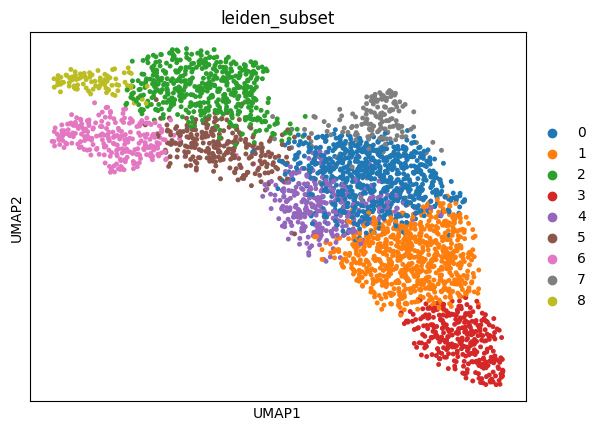

In [4]:
np.random.seed(42)
sc.settings.seed = 42

cdata = cdata[cell_ids].copy()

sc.pp.highly_variable_genes(cdata, n_top_genes=2000, flavor="seurat_v3")

sc.pp.normalize_total(cdata)
sc.pp.log1p(cdata)
sc.pp.scale(cdata, max_value=10)

sc.tl.pca(cdata, use_highly_variable=True)
sc.pp.neighbors(cdata, n_neighbors=15, n_pcs=30)
sc.tl.umap(cdata)

# custom umap for subset of cells
cdata.obsm['X_umap_subset'] = cdata.obsm['X_umap'].copy()

sc.tl.leiden(cdata, resolution=1, key_added='leiden_subset')
sc.pl.umap(cdata, color=['leiden_subset'], size=50)

In [5]:
result_adata, result_array = direct_slingshot_analysis(
    cdata,
    # start_cluster='0',
    cluster_key='leiden_subset',
    embedding_key='X_umap_subset'
)

=====Direct Slingshot Analysis=====
Start cluster: Auto-determined by Slingshot
Cluster key: leiden_subset
Embedding key: X_umap_subset
End clusters: Auto-determined by Slingshot
Running Slingshot analysis...
Successfully imported R packages.
Creating temporary files...
Reading data and running analysis in R...
Found 3 trajectories
Reading results...
Analysis completed successfully!
Trajectory_1: 2447 cells (71.8% coverage)
Trajectory_2: 2176 cells (63.8% coverage)
Trajectory_3: 1865 cells (54.7% coverage)

Analyzing cluster transitions...
Found lineages data: {'Lineage1': [3, 1, 0, 4, 5, 2, 8], 'Lineage2': [3, 1, 0, 4, 5, 6], 'Lineage3': [3, 1, 0, 7]}
Trajectory_1: 3 → 1 → 0 → 4 → 5 → 2 → 8
Trajectory_2: 3 → 1 → 0 → 4 → 5 → 6
Trajectory_3: 3 → 1 → 0 → 7
Trajectory_1: Applied confidence aware correction
  Original pseudotime: ['2.155', '5.701', '9.169', '8.699', '12.024', '14.415', '17.031']
  Corrected pseudotime: ['2.155', '5.701', '9.169', '9.179', '12.024', '14.415', '17.031']
  Co

In [6]:
result_array

[{'path': [3, 1, 0, 4, 5, 2, 8],
  'pseudotime': [2.155270249315558,
   5.701367475356298,
   9.169291221497181,
   9.17929122149718,
   12.023736106077708,
   14.415342020111959,
   17.031447481141246],
  'original_pseudotime': [2.155270249315558,
   5.701367475356298,
   9.169291221497181,
   8.698913953463574,
   12.023736106077708,
   14.415342020111959,
   17.031447481141246],
  'correction_info': {'corrected_pseudotime': [2.155270249315558,
    5.701367475356298,
    9.169291221497181,
    9.17929122149718,
    12.023736106077708,
    14.415342020111959,
    17.031447481141246],
   'original_pseudotime': [2.155270249315558,
    5.701367475356298,
    9.169291221497181,
    8.698913953463574,
    12.023736106077708,
    14.415342020111959,
    17.031447481141246],
   'trajectory_path': [3, 1, 0, 4, 5, 2, 8],
   'method_used': 'confidence_aware',
   'corrections_made': 1,
   'total_deviation': 0.4803772680336067,
   'is_monotonic': True,
   'cluster_data': [{'cluster': 3,
     'ori

In [7]:
result_adata, result_array = direct_slingshot_analysis(
    cdata,
    start_cluster='0',
    cluster_key='leiden_subset',
    embedding_key='X_umap_subset'
)

=====Direct Slingshot Analysis=====
Start cluster: 0
Cluster key: leiden_subset
Embedding key: X_umap_subset
End clusters: Auto-determined by Slingshot
Start cluster size: 772 cells
Running Slingshot analysis...
Successfully imported R packages.
Creating temporary files...
Reading data and running analysis in R...
Found 4 trajectories
Reading results...
Analysis completed successfully!
Trajectory_1: 1872 cells (54.9% coverage)
Trajectory_2: 1560 cells (45.8% coverage)
Trajectory_3: 1836 cells (53.9% coverage)
Trajectory_4: 1018 cells (29.9% coverage)

Analyzing cluster transitions...
Found lineages data: {'Lineage1': [0, 4, 5, 2, 8], 'Lineage2': [0, 4, 5, 6], 'Lineage3': [0, 1, 3], 'Lineage4': [0, 7]}
Trajectory_1: 0 → 4 → 5 → 2 → 8
Trajectory_2: 0 → 4 → 5 → 6
Trajectory_3: 0 → 1 → 3
Trajectory_4: 0 → 7
Trajectory_1: Applied confidence aware correction
  Original pseudotime: ['4.213', '5.366', '8.184', '10.696', '13.406']
  Corrected pseudotime: ['4.213', '5.366', '8.184', '10.696', '1

In [8]:
result_array

[{'path': [0, 4, 5, 2, 8],
  'pseudotime': [4.213485561567284,
   5.36617905907023,
   8.183931301019996,
   10.69583492087777,
   13.406189095322404],
  'original_pseudotime': [4.213485561567284,
   5.36617905907023,
   8.183931301019996,
   10.69583492087777,
   13.406189095322404],
  'correction_info': {'corrected_pseudotime': [4.213485561567284,
    5.36617905907023,
    8.183931301019996,
    10.69583492087777,
    13.406189095322404],
   'original_pseudotime': [4.213485561567284,
    5.36617905907023,
    8.183931301019996,
    10.69583492087777,
    13.406189095322404],
   'trajectory_path': [0, 4, 5, 2, 8],
   'method_used': 'confidence_aware',
   'corrections_made': 0,
   'total_deviation': 0.0,
   'is_monotonic': True,
   'cluster_data': [{'cluster': 0,
     'original_mean': 4.213485561567284,
     'std': 1.3542278468615292,
     'min': 1.74931963175797,
     'max': 7.98464904167628,
     'count': 679},
    {'cluster': 4,
     'original_mean': 5.36617905907023,
     'std': 0.